### Imports

In [10]:
import matplotlib.pyplot as plt

import numpy as np

# Torch 
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data
from torch.optim.lr_scheduler import StepLR

In [11]:
# Make a test dataset and split into train and test
x_dimension = 1
n_datapoints = 100
X = np.random.random([n_datapoints, x_dimension])
A = np.random.rand(x_dimension, 1)

y = X@A + 0.1*np.random.random([n_datapoints, 1]) # noisy linear generation of data

# Split data into test and train
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

class TempModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(x_dimension, 12)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(12, 8)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(8, 1)

    def forward(self, x):
        x = self.hidden1(x)
        x = self.act1(x)
        x = self.hidden2(x)
        x = self.output(x)
        # x = self.act1(self.hidden1(x))
        # x = self.act2(self.hidden2(x))
        return x

model = TempModel()
loss_fn = nn.MSELoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

n_epochs = 1000
batch_size = 10
 
for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')

loss_fn = nn.MSELoss()
print(model)



Finished epoch 0, latest loss 0.057028628885746
Finished epoch 1, latest loss 0.035166073590517044
Finished epoch 2, latest loss 0.021979058161377907
Finished epoch 3, latest loss 0.01505324523895979
Finished epoch 4, latest loss 0.012014747597277164
Finished epoch 5, latest loss 0.010958291590213776
Finished epoch 6, latest loss 0.010623965412378311
Finished epoch 7, latest loss 0.010379163548350334
Finished epoch 8, latest loss 0.010029273107647896
Finished epoch 9, latest loss 0.009583977051079273
Finished epoch 10, latest loss 0.009101836942136288
Finished epoch 11, latest loss 0.008618420921266079
Finished epoch 12, latest loss 0.008147567510604858
Finished epoch 13, latest loss 0.00769867142662406
Finished epoch 14, latest loss 0.007261333521455526
Finished epoch 15, latest loss 0.006826689001172781
Finished epoch 16, latest loss 0.006392179988324642
Finished epoch 17, latest loss 0.005957139655947685
Finished epoch 18, latest loss 0.0055224280804395676
Finished epoch 19, latest 

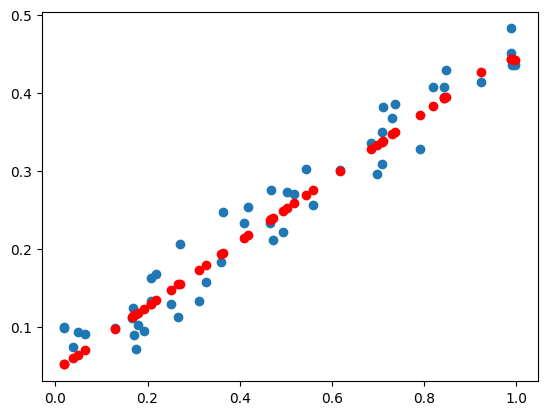

In [16]:
# test the learned model 
new_X = np.random.random([50, x_dimension])
new_y = new_X@A + 0.1*np.random.random([50, 1]) # noisy linear generation of data
pred_y = model(torch.tensor(new_X, dtype=torch.float32)).detach().numpy()
plt.scatter(new_X, new_y)
plt.scatter(new_X, pred_y, color='red')

#### Old code from messing around with stuff

In [ ]:


train_size = int(0.8 * len(expert_dataset))
test_size = len(expert_dataset) - train_size
train_expert_dataset, test_expert_dataset = random_split(
     expert_dataset, [train_size, test_size]
     )

In [ ]:
generator1 = torch.Generator().manual_seed(42)
generator2 = torch.Generator().manual_seed(42)
torch.utils.data.random_split(range(10), [0.3, 0.7], generator=generator1)


In [ ]:
# Print out elements in pytorch subset object split_data[0]
for i in split_data[0]:
    print(i)


    


12
0
6
25
8
15
10
18
16
